In [13]:
import pandas
import requests

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

V datech teprve hledáme vzorce a uspořádání, případně vizualizaci. Jsou to úlohy "bez supervize". Např. eshop - zajímá nás, jaké skupiny lidí u nás nakupují. Další příklad: pro výstupy z médií požijeme - podobné články přiřadí k sobě. Často se řeší pomocí shlukové reprezentace: Cílem je data uspořádat do shluků / clusterů, které naše data reprezentují a dají se později použít pro nová data - podobně jako je tomu u úloh se supervizí.

# K-Means
Výsledkem rozdělení je Voroného diagram. Existují i jiné algoritmy, které nerozdělují prostor do shluků lineárním způsobem. Dokumentace knihovny scikit-learn obsahuje velice pěkný přehled různých shlukovacích metod a jejich chování na lineárně (ne)dělitelných datech. Ve dvou dimenzích si lineárně dělitelná data můžeme představit tak, že jdou na papíře oddělit rovnými čarami.
1) Inicializace: Určíme hodnotu K (známe nebo neznáme ji předem). Tozn. hledáme K clusterů a každý má jeden střed (= centroid). Ty náhodně rozřadí do prostoru našich dat - body v prvním kvartálu, jejich poloha je definována hodnotou na ose x a y.

2) Program přiřadí každý bod z našich dat k jednomu centroidu podle vzdálenosti od tohoto centroidu. Bod patří do takového clusteru, ke kterému centroidu má nejblíže.

3) Přesune centroidy doprosřed bodů, které k němu náleží.

4) Opakujeme body 2 a 3.

Interaktivní K-means: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [14]:
datasets_url = (
    "https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets"
)

r = requests.get(f"{datasets_url}/wine-quality.csv")
open("wine-quality.csv", "wb").write(r.content)
r = requests.get(f"{datasets_url}/wine-quality-targets.csv")
open("wine-quality-targets.csv", "wb").write(r.content)

r = requests.get(f"{datasets_url}/wine-regions.csv")
open("wine-regions.csv", "wb").write(r.content)
r = requests.get(f"{datasets_url}/wine-regions-targets.csv")
open("wine-regions-targets.csv", "wb").write(r.content)

363

In [15]:
X = pandas.read_csv("wine-quality.csv")
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.00000,338.000000,338.000000
mean,6.698521,0.327470,0.315769,5.112130,0.043997,30.042899,125.738166,0.993220,3.20142,0.481361,10.920562
std,1.349656,0.152281,0.129615,4.270963,0.021128,19.809638,43.594591,0.002823,0.15867,0.133732,1.371531
min,1.000000,0.110000,0.000000,0.000000,0.013000,0.000000,10.000000,0.987130,2.83000,0.250000,8.400000
25%,6.200000,0.220000,0.260000,1.600000,0.033000,15.250000,96.000000,0.990985,3.08000,0.380000,9.800000
50%,6.800000,0.290000,0.310000,3.825000,0.040000,29.000000,119.000000,0.993000,3.19000,0.460000,11.000000
75%,7.300000,0.380000,0.370000,7.600000,0.050000,39.000000,155.000000,0.995080,3.31000,0.570000,12.100000
max,10.200000,1.100000,0.880000,17.550000,0.290000,138.500000,272.000000,1.000600,3.72000,0.950000,14.000000


Maximální a minimální hodnoty jednotlivých proměnných se velmi liší, je tedy vhodné data normalizovat.

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Jedna z metod, která nám sníží počet proměnných ("redukuje dimenzionalitu") se jmenuje t-SNE (t-distributed Stochastic Neighbor Embedding):
- init označuje metodu inicializace. Obecně se předpokládá, že pokud chceme zachovat vztahy mezi datovými body (ty které si byly blízké v našich mnoha dimenzích si jsou stále blízké v méně dimenzích) je dobré zvolit metodu "pca".
- n_components: počet výsledných proměnných, u t-SNE typicky volíme hodnotu 2 nebo 3.
- perplexity určuje, podle kolika sousedů se má metoda t-SNE řídit. Čím vyšší je náš dataset, tím vyšší hodnotu parametru nastavíme. Běžně se používají hodnoty mezi 5 a 50.
- learning_rate označuje velikost učícího kroku - k výsledku se t-SNE dopracovává iterativně, a s velkou hodnotou learning rate postupuje sice rychle, ale může optimální výsledek "přeskočit", s malou hodnotou postupuje pečlivěji, ale může zase skončit v nějakém neoptimálním stavu. Vyzkoušejte si, jaký vliv má tento parametr na zobrazení vašich dat tak, že postupně nastavíte velmi malé (kolem 10) i velmi vysoké hodnoty (kolem 1000). Pro naše účely necháme TSNE ať nám tento parametr nastaví za nás.

In [17]:
tsne = TSNE(
    init="pca",
    n_components=2,
    perplexity=10,
    learning_rate="auto",
    random_state=0,
)

X = tsne.fit_transform(X)
X.shape

/Users/hedvikapajerova/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(338, 2)

Nyní máme jen dva sloupce.

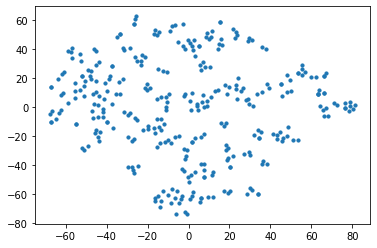

In [19]:
plt.scatter(X[:, 0], X[:, 1], s=10)

- X[:, 0] = osa x
- X[:, 1] = osa y
- s=10 = velikost teček

In [20]:
model = KMeans(n_clusters=2, random_state=0)
labels = model.fit_predict(X)

n_clusters - určujeme si, zde hledáme lepší a horší vína, ale pokud bychom vůbec neměli záměr, pravděpodobně bychom experimentovali a hledali, kolik clusterů dává největší smysl

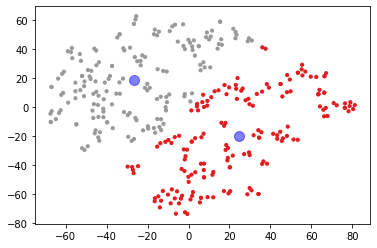

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap="Set1")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="blue", s=100, alpha=0.5)

- c=lables: barva teček
- alpha = The alpha blending value, between 0 (transparent) and 1 (opaque).

# Vyhodnocení úspěšnosti clusterovacího algoritmu
Silhouette koeficient bere v úvahu průměrnou vzdálenost mezi bodem a všemi body, které jsou ve stejném shluku, a pak vzdálenost mezi bodem a všemi body v nejbližším jiném shluku. Jeho hodnota se nachází mezi 1 a -1. Čím vyšší je tento koeficient, tím lépe definované jsou clustery (body se nachází blízko svému shluku a daleko od všech ostatních). Pokud má hodnotu kolem nuly, značí to, že se naše shluky překrývají (existují body na rozhraní dvou shluků). Pokud je záporný, zřejmě existují body zařazené do nesprávných shluků.

In [31]:
silhouette_score(X, labels)

0.38307297

For n_clusters = 2 The average silhouette_score is : 0.38307297


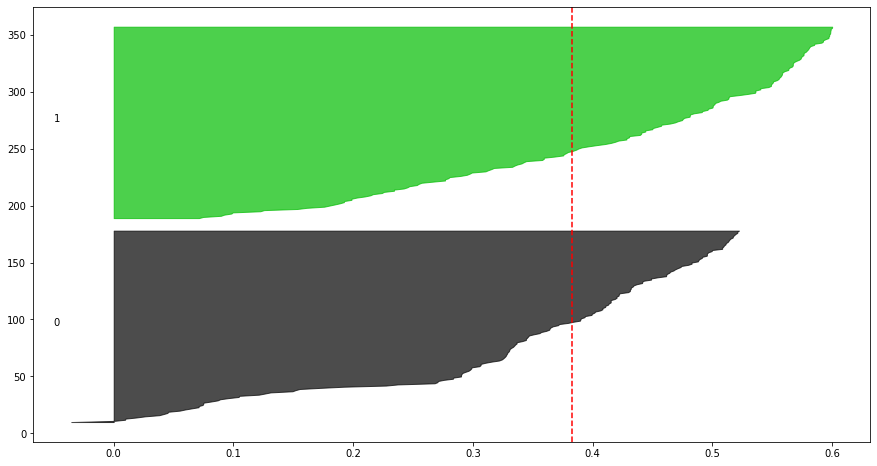

In [32]:
# Podle
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
n_clusters = model.n_clusters

fig, ax = plt.subplots(figsize=(15, 8))

silhouette_avg = silhouette_score(X, labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.axvline(x=silhouette_avg, color="red", linestyle="--")

- osa y = počet "řádků" datasetu, v našem případě počet bodů
- osa x = hodnota silhouette koeficientu

Měli bychom se vyvarovat situace, kdy celý jeden cluster je pod průměrným silhouette koeficientem (tj. nalevo od červené čáry), dále můžeme pozorovat velikost jednotlivých clusterů (výška barevné sekce) a jestli nejsou rozdíly mezi barevnými sekcemi příliš velké co se týče šířky (hodnota koeficientu pro jednotlivé body).

Nyní si data doplníme o skutečné hodnoty a porovnáme naše clustery s nimi.

In [34]:
y = pandas.read_csv("wine-quality-targets.csv")
y = y["quality"]
y

0      1
1      1
2      1
3      0
4      1
      ..
333    1
334    1
335    0
336    0
337    0
Name: quality, Length: 338, dtype: int64

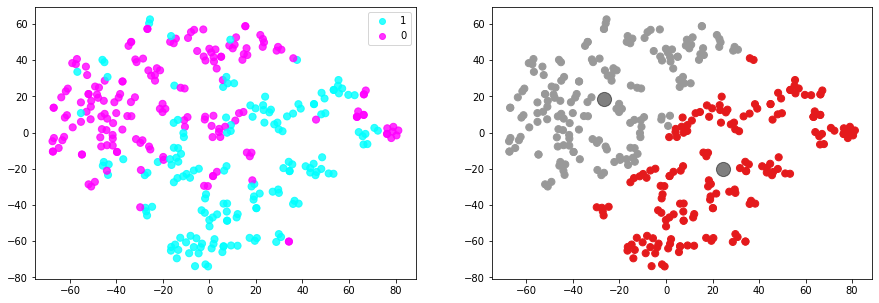

In [35]:
plt.figure(figsize=(15, 5))

# sp1
plt.subplot(121)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="cool", alpha=0.8)
centers = model.cluster_centers_
plt.legend(handles=scatter.legend_elements()[0], labels=list(y.unique()))

# sp2
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap="Set1")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

Nalevo: ralita, napravo: náš odhad